<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/Castillo%2C_Ronel_Christian_Hands_on_Activity_1_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.1 : Introduction to Machine Learning

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements.

Import the libraries and the dataset

In [5]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('/content/Iris_Data.csv')
#check the content of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Determine the following:
* The number of data points (rows).
* The column names.
* The data types for each column.

In [6]:
#the number of datapoints
print(data.shape[0])

#the column names
print(data.columns.tolist())

#the data types for each column
print(data.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [7]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determine the following:
* The number of each species present.
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [8]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [9]:
# The mean calculation
data.groupby('species').mean()



,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [10]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [11]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

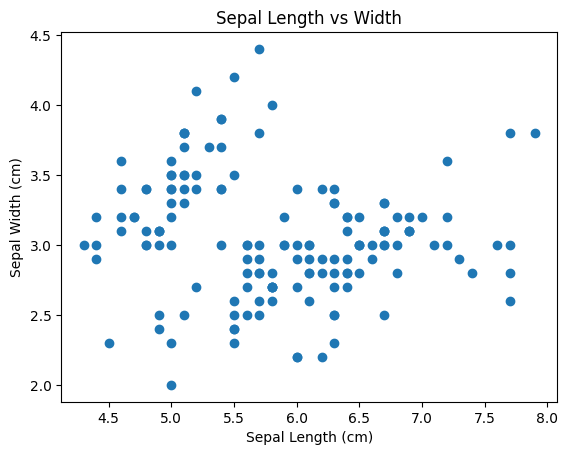

In [12]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot.

Type your answer here

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

Type your answer here

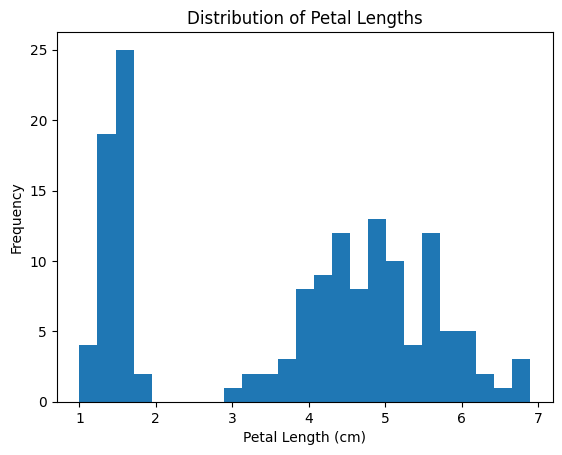

In [13]:
#histogram
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)',
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot?

type your answer here

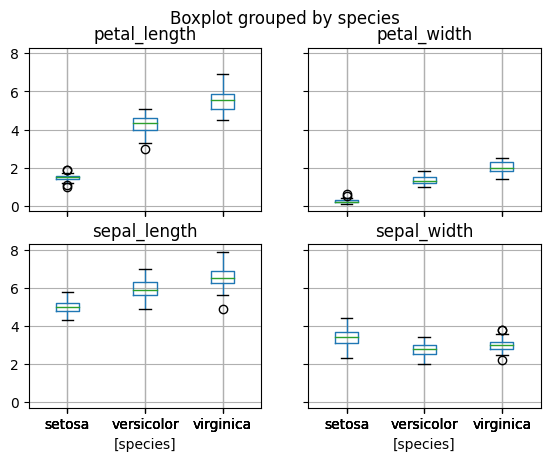

In [14]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [15]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


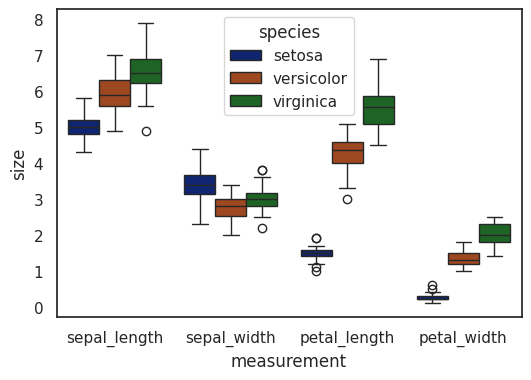

In [16]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements.

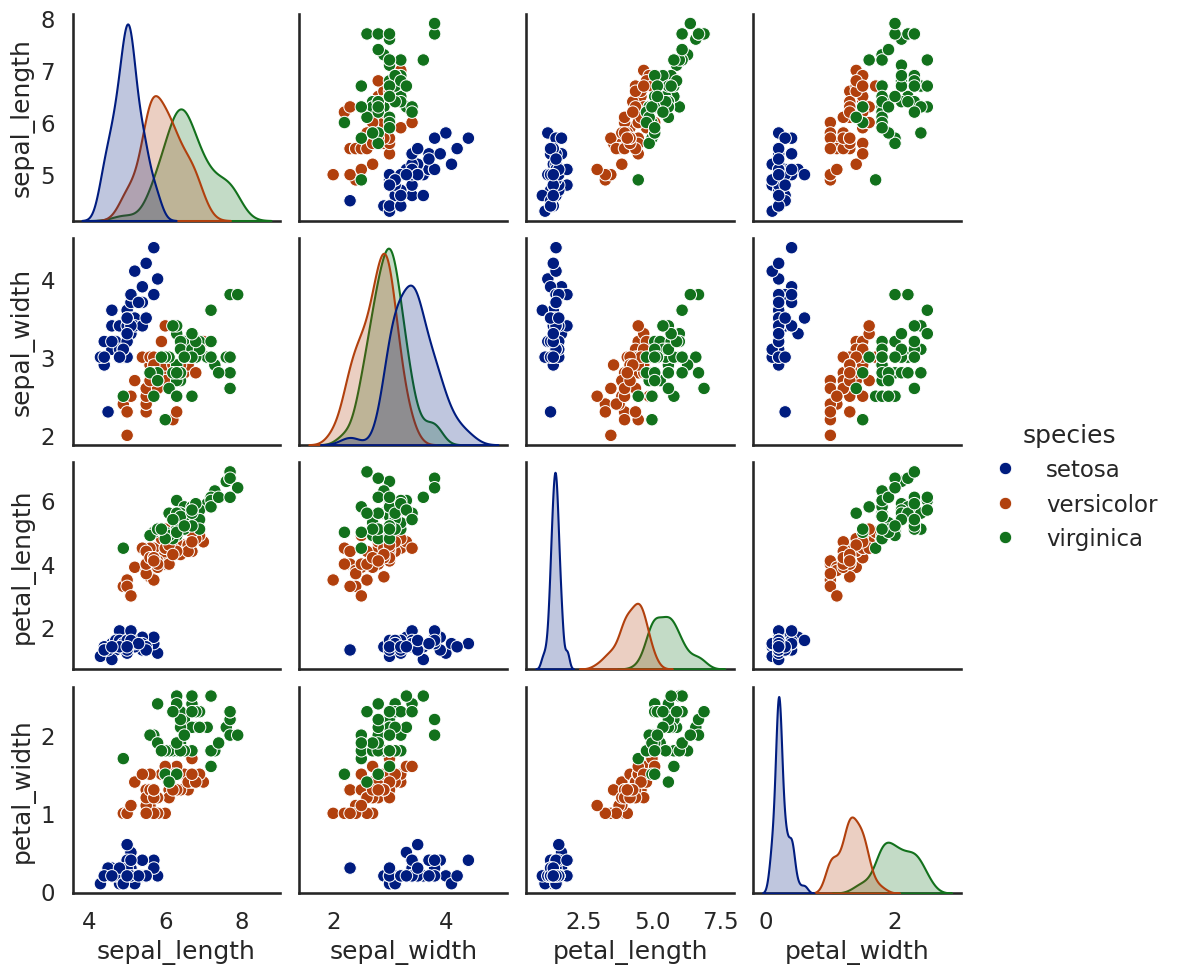

In [17]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');



Interpret the result of correlation using the pairplot

Type your answer here

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values.
* Perform descriptive statistics such as mean, median and mode
* Compare and analyze your data using data visualization

# **Chosen Dataset: Drug Indications (Drug Engineering Using AI)**

**Link:** https://www.kaggle.com/datasets/deepakdeepu8978/drug-indications-drug-engineering-with-ai



In [59]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('/content/amzn (1).csv')
#check the content of the dataframe
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [60]:
#the number of datapoints
print(data.shape[0])

6516


In [61]:
#the column names
print(data.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [62]:
#the data types for each column
print(data.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [63]:
# drop unneccesary tables

newData = data.drop(['Date'], axis=1)
newData.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [64]:
# Data cleaning

# Removing duplicates
newData.drop_duplicates(inplace=True)
newData.head()


,Open,High,Low,Close,Adj Close,Volume
0,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [65]:
# fill NA values

newData= newData.fillna('')
pd.DataFrame(newData)

,Open,High,Low,Close,Adj Close,Volume
0,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
6511,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [66]:
# Perform descriptive statistics such as mean, median and mode
stats_data = newData.describe()
stats_data.loc['mode'] = newData.mode().iloc[0]
out_fields = ['mean','25%','50%','75%', 'mode']
stats_data = stats_data.loc[out_fields]
stats_data.rename({'50%': 'median'}, inplace=True)
stats_data


,Open,High,Low,Close,Adj Close,Volume
mean,31.611626,31.991995,31.193432,31.599740,31.599740,1.425338e+08
25%,1.998875,2.028500,1.964750,2.001250,2.001250,6.888182e+07
median,6.456750,6.535500,6.353250,6.444250,6.444250,1.059050e+08
75%,38.451375,38.688000,38.203001,38.464625,38.464625,1.607700e+08
mode,1.675000,0.850000,0.073958,0.075521,0.075521,5.827200e+07


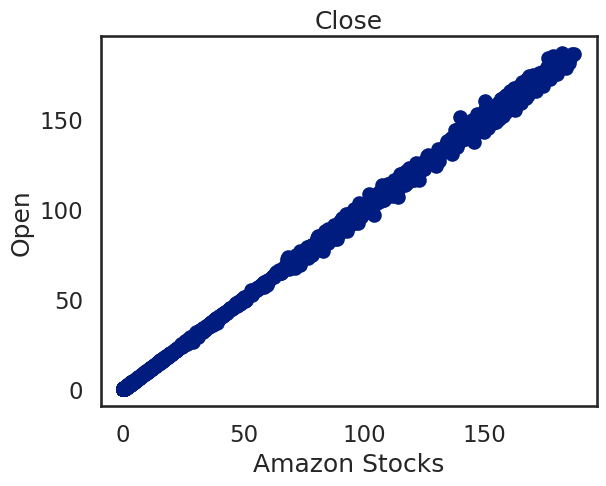

In [74]:
# Compare and analyze your data using data visualization
import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()
ax.scatter(newData.Open, newData.Close)
ax.set(xlabel='Amazon Stocks',
 ylabel='Open',
 title='Close');


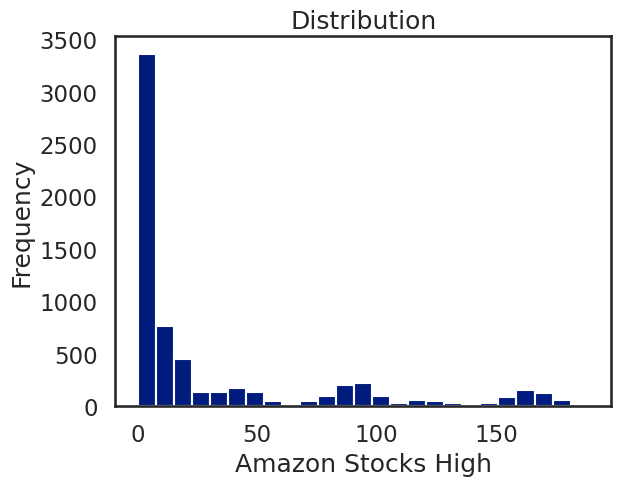

In [75]:
ax = plt.axes()
ax.hist(newData.High, bins=25);
ax.set(xlabel='Amazon Stocks High',
 ylabel='Frequency',
 title='Distribution');


Conclusion:

This was already tackled on our Elective 1 Class so I was quite familiar with navigating around seaborn, pandas, and numphy.